In [ ]:
! pip install glmnet_py


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! sudo apt-get install libgfortran3

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgfortran3 is already the newest version (6.5.0-2ubuntu1~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [ ]:
import os
import argparse
import time
import random
import sys

import sklearn
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import r2_score,mean_squared_error as MSE


In [ ]:
import scipy, importlib, pprint, matplotlib.pyplot as plt, warnings
from glmnet import glmnet; from glmnetPlot import glmnetPlot
from glmnetPrint import glmnetPrint; from glmnetCoef import glmnetCoef; from glmnetPredict import glmnetPredict
from cvglmnet import cvglmnet; from cvglmnetCoef import cvglmnetCoef
from cvglmnetPlot import cvglmnetPlot; from cvglmnetPredict import cvglmnetPredict

## Glmnet Vignette

In [ ]:
df_v3 = pd.read_csv("data_df_v2.csv")

# %%

# find columns that are not float/int

for column in df_v3.columns:

    if df_v3[column].dtype==object:

        print(column)

# Only 'Geno_Code' is object type.

"""
Description: Data Analysis
Made on 11-20-2022 12:26:58
@author: sirsh
"""

'''
Way to many variables to explore
Use glmnet (CCD Algorithm) as mentioned in paper
'''

import glmnet_python

from glmnet import glmnet

df_x = df_v3.iloc[:,3:-2]

df_y = df_v3[["DtoA"]]



print(df_x.head())
print(df_y.head())

print(df_x.shape)
print(df_y.shape)



fit = glmnet(x=df_x.to_numpy(),y=df_y.to_numpy(),alpha=0.2,nlambda=20)



Geno_Code
    m1   m2   m3   m4   m5   m6   m7   m8   m9  m10  ...  m7380  m7381  m7382  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...    0.0    0.0    0.0   
1  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  ...    2.0    2.0    2.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    2.0    2.0    2.0   
4  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  ...    0.0    0.0    0.0   

   m7383  m7384  m7385  m7386  m7387  m7388  m7389  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    2.0    2.0    2.0    2.0    2.0    2.0    2.0  
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3    2.0    2.0    2.0    2.0    2.0    2.0    2.0  
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 7389 columns]
      DtoA
0  75.5364
1  76.9075
2  75.2646
3  73.6933
4  79.2441
(4494, 7389)
(4494, 1)


In [ ]:
glmnetPrint(fit)

	 df 	 %dev 	 lambdau

0 	 0.000000 	 0.000000 	 2.583968
1 	 15.000000 	 0.009627 	 2.027795
2 	 43.000000 	 0.022575 	 1.591332
3 	 68.000000 	 0.038686 	 1.248814
4 	 88.000000 	 0.052673 	 0.980019
5 	 117.000000 	 0.064613 	 0.769080
6 	 159.000000 	 0.075861 	 0.603543
7 	 183.000000 	 0.086905 	 0.473636
8 	 207.000000 	 0.097392 	 0.371691
9 	 243.000000 	 0.108490 	 0.291688
10 	 272.000000 	 0.119054 	 0.228905
11 	 337.000000 	 0.132171 	 0.179636
12 	 401.000000 	 0.149474 	 0.140971
13 	 484.000000 	 0.169614 	 0.110628
14 	 608.000000 	 0.193815 	 0.086817
15 	 799.000000 	 0.224488 	 0.068130
16 	 981.000000 	 0.260331 	 0.053466
17 	 1191.000000 	 0.300360 	 0.041958
18 	 1448.000000 	 0.344511 	 0.032927
19 	 1733.000000 	 0.391500 	 0.025840


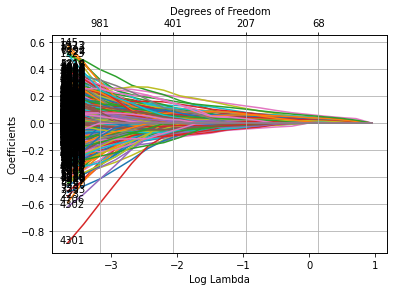

{'fig': <Figure size 432x288 with 2 Axes>,
 'ax1': <matplotlib.axes._subplots.AxesSubplot at 0x7f6eae0b4310>,
 'ax2': <matplotlib.axes._subplots.AxesSubplot at 0x7f6e72546b90>}

In [ ]:
glmnetPlot(fit, xvar = 'lambda', label = True)

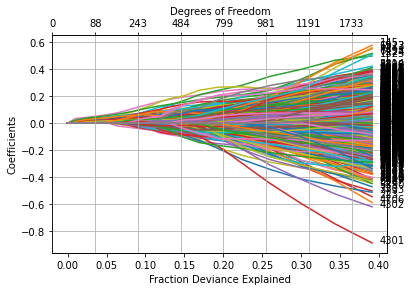

In [ ]:
glmnetPlot(fit, xvar = 'dev', label = True);

In [ ]:
any(fit['lambdau'] == 0.5)

False

In [ ]:
fit["df"]

array([   0,   15,   43,   68,   88,  117,  159,  183,  207,  243,  272,
        337,  401,  484,  608,  799,  981, 1191, 1448, 1733])

In [ ]:
cols =  fit["df"]+3
cols

array([   3,   18,   46,   71,   91,  120,  162,  186,  210,  246,  275,
        340,  404,  487,  611,  802,  984, 1194, 1451, 1736])

In [ ]:
df_v3.iloc[:,cols]

,m1,m16,m44,m69,m89,m118,m160,m184,m208,m244,m273,m338,m402,m485,m609,m800,m982,m1192,m1449,m1734
0,1.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
1,2.0,2.0,2.000000,2.0,2.0,2.000000,2.0,2.0,0.0,0.0,0.0,0.000000,2.0,2.0,0.0,0.0,2.0,2.0,2.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,2.000000,2.0,2.0,1.0,1.0,0.0,0.000000,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,2.0,2.0,2.0,1.983857,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0
4,2.0,2.0,0.000000,0.0,0.0,1.431652,2.0,2.0,2.0,2.0,2.0,2.000000,2.0,2.0,2.0,0.0,2.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4489,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2.000000,2.0,0.0,2.0,2.0,0.0,2.0,1.0,0.0
4490,2.0,2.0,2.000000,2.0,2.0,2.000000,2.0,2.0,2.0,2.0,2.0,2.000000,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
4491,1.0,1.0,2.000000,2.0,2.0,2.000000,2.0,2.0,2.0,2.0,0.0,1.000000,1.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0
4492,2.0,2.0,0.000000,0.0,0.0,2.000000,0.0,0.0,0.0,2.0,2.0,2.000000,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_20_var_x = df_v3.iloc[:,cols]
data_20_var_y = df_v3[["DtoA"]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.30 ,random_state=40)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(n_jobs=1, normalize=False)

In [ ]:
pred_train_lr= lr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

pred_test_lr= lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print(r2_score(y_test, pred_test_lr))

5.559212736605968e-14
1.0
6.639498082043972
-2.328132689229228


Text(0.5, 1.0, 'Actual vs. Predicted')

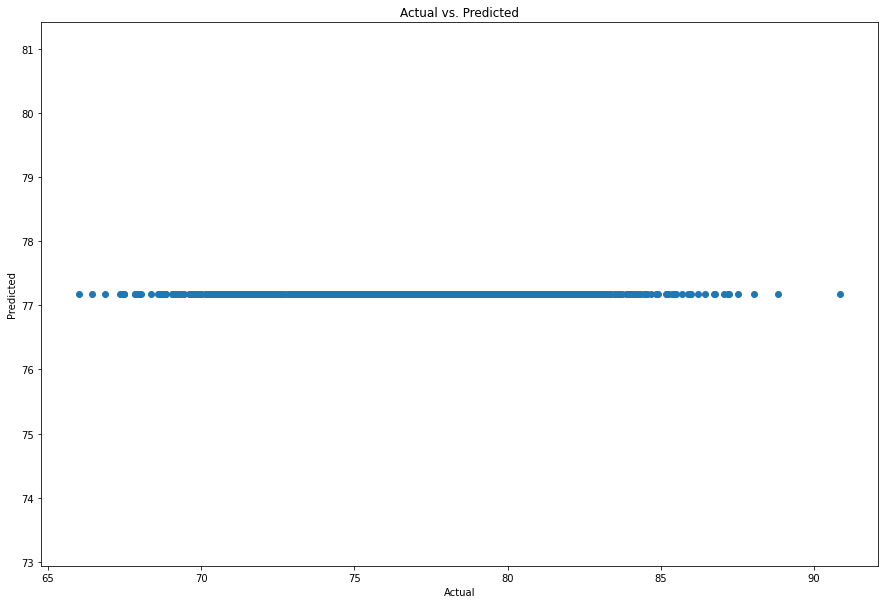

In [ ]:
# import matplotlib.pyplot as plot
# plot.figure(figsize=(15,10))
# plot.scatter(y_test,y_pred)
# plot.xlabel('Actual')
# plot.ylabel('Predicted')
# plot.title('Actual vs. Predicted')


## Ridge Regression




In [1]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

NameError: ignored

In [ ]:
# import matplotlib.pyplot as plot
# plot.figure(figsize=(15,10))
# plot.scatter(y_test,y_pred)
# plot.xlabel('Actual')
# plot.ylabel('Predicted')
# plot.title('Actual vs. Predicted')

## Lasso Regression


In [ ]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

3.6867345354108756
0.0
3.6405094432862475
-0.000586080853545834


Text(0.5, 1.0, 'Actual vs. Predicted')

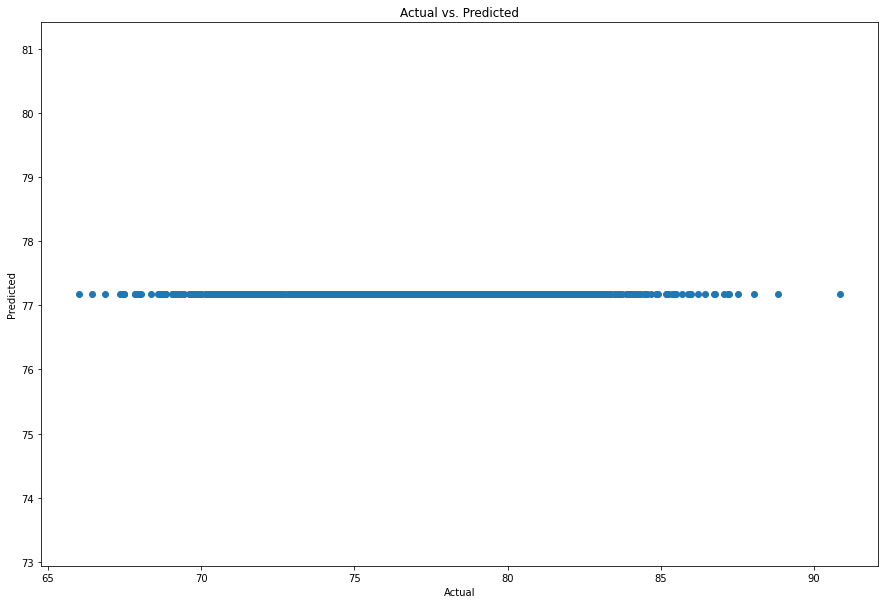

In [ ]:
# import matplotlib.pyplot as plot
# plot.figure(figsize=(15,10))
# plot.scatter(y_test,y_pred)
# plot.xlabel('Actual')
# plot.ylabel('Predicted')
# plot.title('Actual vs. Predicted')

## ElasticNet Regression

In [ ]:
#Elastic Net
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print(r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))

3.6632221326547567
0.012714464005549875
3.621121624213598
0.010042940315004745


In [ ]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=1.0,l1_ratio=0.5)

In [ ]:
enet.fit(X_train,y_train)

ElasticNet()

In [ ]:
y_pred= enet.predict(X_test)

In [ ]:
print(y_pred)

[77.17889959 77.17889959 77.17889959 ... 77.17889959 77.17889959
 77.17889959]


In [ ]:
#print("Slope: %.2f" % enet.coef_[0])

In [ ]:
#print("Intercept: %.2f", % enet.intercept_)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

13.253309006656343

In [ ]:
from scipy.sparse.linalg.isolve.minres import sqrt
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE : % f" %(rmse))

RMSE :  3.640509


In [ ]:
r2_score(y_test,y_pred)

-0.000586080853545834

Text(0.5, 1.0, 'Actual vs. Predicted')

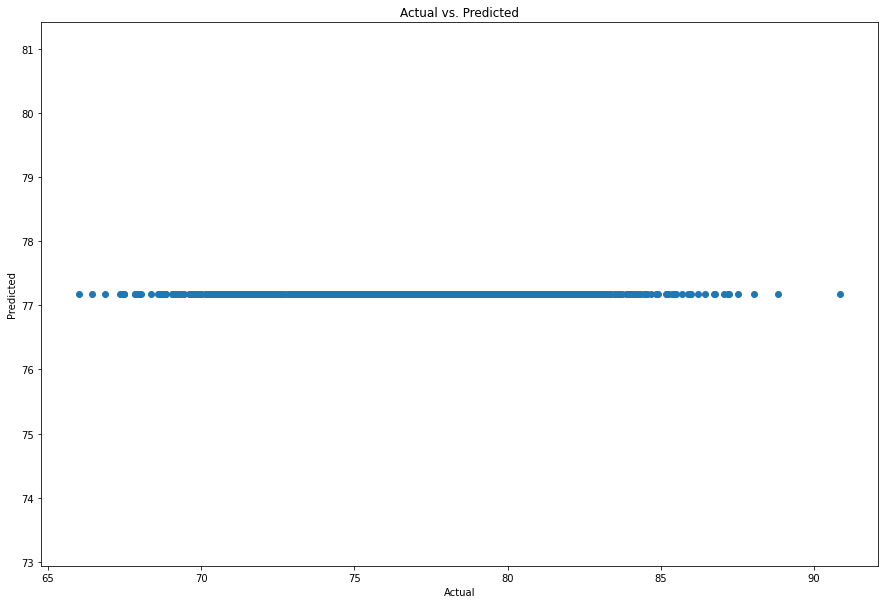

In [ ]:
import matplotlib.pyplot as plot
plot.figure(figsize=(15,10))
plot.scatter(y_test,y_pred)
plot.xlabel('Actual')
plot.ylabel('Predicted')
plot.title('Actual vs. Predicted')